In [2]:
from IPython.display import YouTubeVideo
from factory import schematic

# The Factory

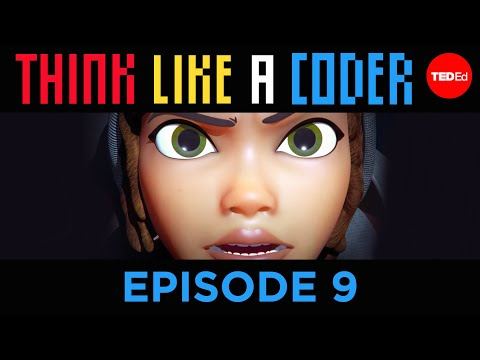

In [7]:
YouTubeVideo(id="5y0pcLkD7-I",width="980", height="551.25")

## What Hedge can do
### Use Functions
To use recursion you need to create a function first. To create a function you start with the keyword `def` followed by the name of your function. For example `my_function`. After the name of your function you list the input arguments between brackets. Multiple arguments are seperated by commas. It is also possible to have no input arguments.
```python
def my_function(message):
    print(message)
my_function("Hello World")
```
Output:
```text
Hello World
```
The input arguments are variables that can only be used inside your function.
```python
def my_function(message):
    print(message)
print(message)
```
Results in the following error.
```Text
NameError: name 'message' is not defined
```

### Use recursion
When a function calls itself it is called _recursion_. When the function always calls itself, the function has no way to stop!  

Use conditionals to determine if the function should call itself again or not.
```python
def recursive_count_down(start):
    print(start)
    if start != 0:
        recursive_count_down(start-1)
        
recursive_count_down(5)
```
Output:
```text
5
4
3
2
1
0
```



### Walk a through the maze using a solution
```python
maze.walk(['left', 'right', 'left'])
```
Output:
```text
Ethic reached the exit safely
```

### Use loops
See episode 1

### Use conditionals
See episode 2

### Use variables
See episode 3





## Visualize the schematic

Optionally you can visualize the schematic. You need to have [GraphViz](https://graphviz.readthedocs.io/en/stable/manual.html) installed to visualize the schematic

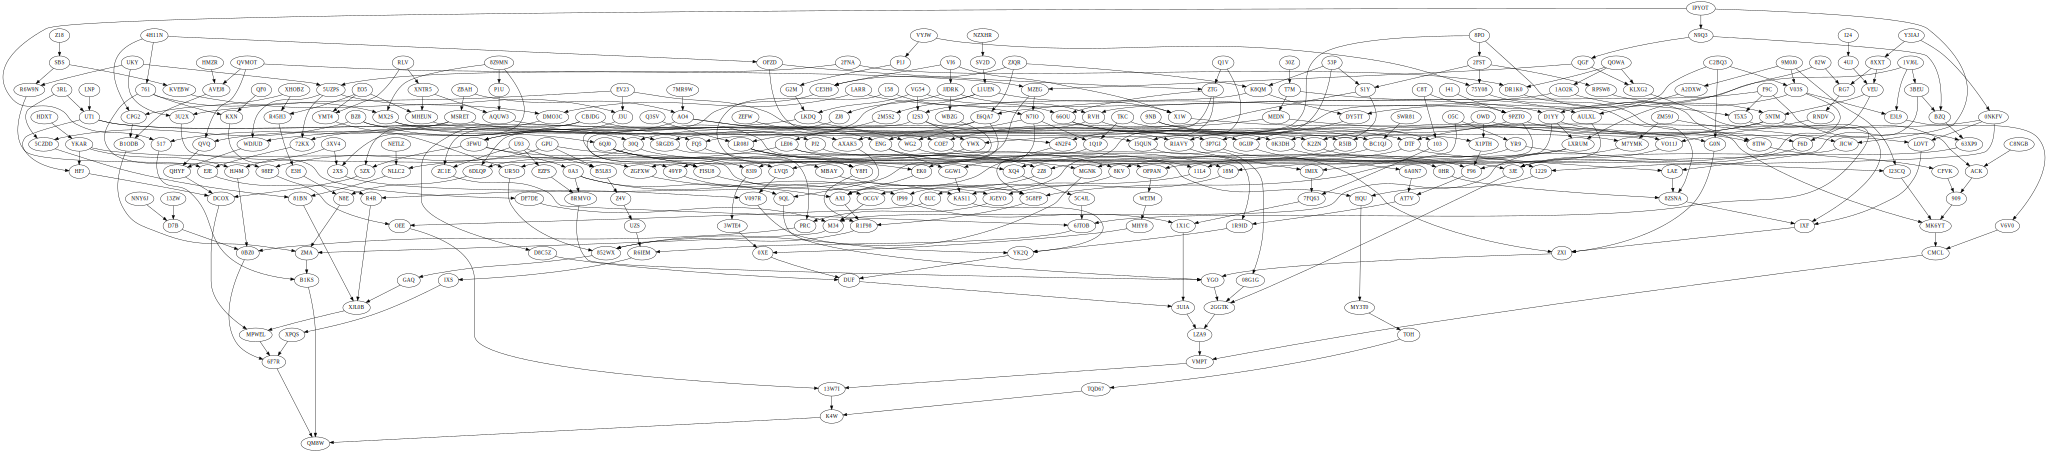

In [3]:
from factory import visualize_schematic
visualize_schematic(schematic)

In [2]:
from collections import defaultdict

key_before_value = defaultdict(list)
for edge in schematic.edges:
    key_before_value[edge[0]]+=[edge[1]]

key_after_value = defaultdict(list)
for edge in schematic.edges:
    key_after_value[edge[1]]+=[edge[0]]

key_after_value

defaultdict(list,
            {'XQVEJ': ['PEJ', 'NTK0O'],
             '45IY': ['P1W', 'WGG3'],
             'EUA0': ['P1W', '7UC2S'],
             '4JWL': ['BCX', 'LBY'],
             '5S9Q6': ['DWPMJ'],
             'KCAH': ['U2BH8', 'J13H'],
             'V90': ['PEQKC', 'HOY'],
             'NTK0O': ['VFJF'],
             'WWL': ['VFJF', 'WDD3'],
             'MWZ': ['VFJF', '943B'],
             'H4Y': ['KP3LI'],
             'J0O9E': ['KP3LI', 'JU3'],
             'CMR3': ['J7T', 'V85A'],
             'CRZLK': ['J7T', 'SWG1'],
             'ZZTWH': ['J7T', 'J13H'],
             '5MC': ['3HI', 'NJVW'],
             'YTWML': ['NTK0O', 'GVTZ4'],
             'AVPP': ['NTK0O'],
             'QXVSC': ['I9I0'],
             'XZPU': ['I9I0', '0MJV'],
             'J7K5F': ['N2KTL', '3BF'],
             '2SBG': ['WDD3', 'AHPP'],
             '503E7': ['WWL', 'U6U'],
             'CM3': ['WWL', 'CMR3'],
             'YYN': ['WWL'],
             'B7O8W': ['HSV', 'BZSK'],
             'UAT'

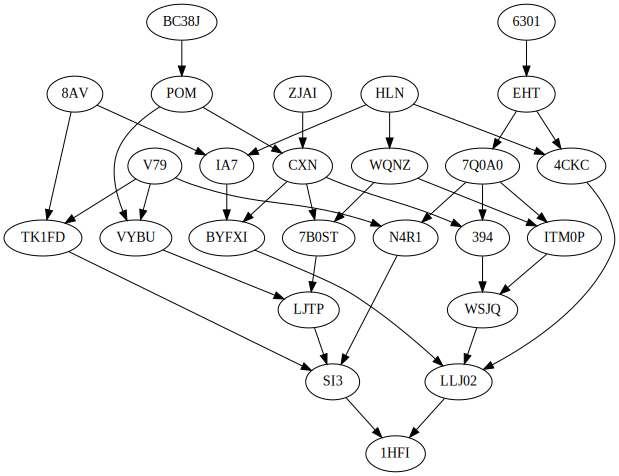

In [5]:
from factory import generate_schematic

schematic = generate_schematic(20)
visualize_schematic(schematic)
# ['IMQ', 'CGN', 'SZSRW', 'QGQ8U', 'U8J', 'CKX2', 'SME', 'XQ3S', 'R1U', 'VYT', 'YOI',
#  '31ET', 'SAON', '135QS', 'KLTD', 'JU2', 'IRCL', '6JKK', '9QAU', '62Q1M', 'RN85K', 'LKT', 'UI3ZU', 'YGZLM', 'HIL3Y']


In [6]:


key_before_value = {}
key_after_value = {}

for edge in schematic.edges:
    if edge[0] in key_before_value:
        key_before_value[edge[0]]+=[edge[1]]
    else:
        key_before_value[edge[0]]=[edge[1]]
        
    if edge[1] in key_after_value:
        key_after_value[edge[1]]+=[edge[0]]
    else:
        key_after_value[edge[1]]=[edge[0]]
print(key_before_value)
print(key_after_value)
instruction_order = []
remainder = []
while key_before_value:
    for key, value in list(key_before_value.items()):
        if key not in key_after_value:
            for aftervalue in value:
                key_after_value[aftervalue].remove(key)
                if not key_after_value[aftervalue]:
                    key_after_value.pop(aftervalue)
                elif aftervalue in remainder:
                    print("Hey!")
                    remainder.remove(aftervalue)
                else:
                    remainder.append(aftervalue)
            
            key_before_value.pop(key)
            instruction_order.append(key)
        else:
            print("else", key, value)
    
    
print(key_before_value, key_after_value)
print(instruction_order)
print(remainder)

{'V79': ['N4R1', 'TK1FD', 'VYBU'], 'ITM0P': ['WSJQ'], 'CXN': ['7B0ST', '394', 'BYFXI'], '7Q0A0': ['ITM0P', 'N4R1', '394'], 'POM': ['VYBU', 'CXN'], 'HLN': ['4CKC', 'IA7', 'WQNZ'], 'TK1FD': ['SI3'], 'VYBU': ['LJTP'], '8AV': ['IA7', 'TK1FD'], 'SI3': ['1HFI'], 'WQNZ': ['7B0ST', 'ITM0P'], 'LLJ02': ['1HFI'], 'WSJQ': ['LLJ02'], '7B0ST': ['LJTP'], 'LJTP': ['SI3'], 'ZJAI': ['CXN'], 'EHT': ['7Q0A0', '4CKC'], 'IA7': ['BYFXI'], 'BC38J': ['POM'], '4CKC': ['LLJ02'], '6301': ['EHT'], '394': ['WSJQ'], 'N4R1': ['SI3'], 'BYFXI': ['LLJ02']}
{'N4R1': ['V79', '7Q0A0'], 'TK1FD': ['V79', '8AV'], 'WSJQ': ['ITM0P', '394'], '7B0ST': ['CXN', 'WQNZ'], 'ITM0P': ['7Q0A0', 'WQNZ'], 'VYBU': ['POM', 'V79'], '4CKC': ['HLN', 'EHT'], 'SI3': ['TK1FD', 'LJTP', 'N4R1'], 'LJTP': ['VYBU', '7B0ST'], 'IA7': ['8AV', 'HLN'], '1HFI': ['SI3', 'LLJ02'], 'LLJ02': ['WSJQ', '4CKC', 'BYFXI'], '394': ['CXN', '7Q0A0'], 'CXN': ['ZJAI', 'POM'], '7Q0A0': ['EHT'], 'BYFXI': ['IA7', 'CXN'], 'POM': ['BC38J'], 'EHT': ['6301'], 'WQNZ': ['HLN']}
el